In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV,train_test_split
import math
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import roc_auc_score, roc_curve
import data_preprocess as pp
from keras.optimizers import Adam
import data_preprocess as pp

In [5]:
output_dim_const = 0
input_dim_const = 0 
epoch_const = 20
batch_size_const = 10000
learn_rate_const = 0.1
dropout_const = 0

In [23]:
df_train_x = pp.loadData('X_train.csv')
y_train = np.ravel(pp.loadData('Y_train.csv'))
df_test = pp.loadData('X_test.csv')

print("Sampling the data for NN")

X_train, X_test, Y_train, Y_test = train_test_split(df_train_x, y_train, test_size = 0.8)


Sampling the data for NN


In [24]:
print("Finding number of neurons for NN")
global_var = globals()

output_dim = find_best_output_size(X_train, Y_train, X_test, Y_test)

global_var['input_dim_const'] = df_train_x.shape[1]
global_var['output_dim_const'] = output_dim


Finding number of neurons for NN
Epoch 1/20
2/2 [==============================] - 1s 14ms/step - loss: 0.6626 - accuracy: 0.3466
Epoch 2/20
2/2 [==============================] - 0s 16ms/step - loss: 0.2349 - accuracy: 0.9591
Epoch 3/20
2/2 [==============================] - 0s 27ms/step - loss: 0.2346 - accuracy: 0.9589
Epoch 4/20
2/2 [==============================] - 0s 35ms/step - loss: 0.1876 - accuracy: 0.9593
Epoch 5/20
2/2 [==============================] - 0s 59ms/step - loss: 0.1778 - accuracy: 0.9588
Epoch 6/20
2/2 [==============================] - 0s 18ms/step - loss: 0.1626 - accuracy: 0.9584
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1579 - accuracy: 0.9589
Epoch 8/20
2/2 [==============================] - 0s 32ms/step - loss: 0.1568 - accuracy: 0.9589
Epoch 9/20
2/2 [==============================] - 0s 23ms/step - loss: 0.1539 - accuracy: 0.9593
Epoch 10/20
2/2 [==============================] - 0s 21ms/step - loss: 0.1527 - accuracy: 0.9

2/2 [==============================] - 0s 15ms/step - loss: 0.1907 - accuracy: 0.9605
Epoch 5/20
2/2 [==============================] - 0s 11ms/step - loss: 0.1799 - accuracy: 0.9602
Epoch 6/20
2/2 [==============================] - 0s 15ms/step - loss: 0.1610 - accuracy: 0.9606
Epoch 7/20
2/2 [==============================] - 0s 23ms/step - loss: 0.1554 - accuracy: 0.9604
Epoch 8/20
2/2 [==============================] - 0s 15ms/step - loss: 0.1488 - accuracy: 0.9606
Epoch 9/20
2/2 [==============================] - 0s 15ms/step - loss: 0.1502 - accuracy: 0.9602
Epoch 10/20
2/2 [==============================] - 0s 17ms/step - loss: 0.1477 - accuracy: 0.9602
Epoch 11/20
2/2 [==============================] - 0s 16ms/step - loss: 0.1417 - accuracy: 0.9607
Epoch 12/20
2/2 [==============================] - 0s 11ms/step - loss: 0.1428 - accuracy: 0.9602
Epoch 13/20
2/2 [==============================] - 0s 11ms/step - loss: 0.1395 - accuracy: 0.9605
Epoch 14/20
2/2 [====================

2/2 [==============================] - 0s 22ms/step - loss: 0.1564 - accuracy: 0.9598
Epoch 9/20
2/2 [==============================] - 0s 14ms/step - loss: 0.1486 - accuracy: 0.9605
Epoch 10/20
2/2 [==============================] - 0s 13ms/step - loss: 0.1474 - accuracy: 0.9605
Epoch 11/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1472 - accuracy: 0.9604
Epoch 12/20
2/2 [==============================] - 0s 10ms/step - loss: 0.1455 - accuracy: 0.9603
Epoch 13/20
2/2 [==============================] - 0s 10ms/step - loss: 0.1437 - accuracy: 0.9603
Epoch 14/20
2/2 [==============================] - 0s 17ms/step - loss: 0.1416 - accuracy: 0.9603
Epoch 15/20
2/2 [==============================] - 0s 15ms/step - loss: 0.1397 - accuracy: 0.9602
Epoch 16/20
2/2 [==============================] - 0s 9ms/step - loss: 0.1379 - accuracy: 0.9604
Epoch 17/20
2/2 [==============================] - 0s 11ms/step - loss: 0.1369 - accuracy: 0.9605
Epoch 18/20
2/2 [==================

2/2 [==============================] - 0s 8ms/step - loss: 0.1490 - accuracy: 0.9606
Epoch 13/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1482 - accuracy: 0.9602
Epoch 14/20
2/2 [==============================] - 0s 20ms/step - loss: 0.1465 - accuracy: 0.9605
Epoch 15/20
2/2 [==============================] - 0s 14ms/step - loss: 0.1455 - accuracy: 0.9607
Epoch 16/20
2/2 [==============================] - 0s 13ms/step - loss: 0.1443 - accuracy: 0.9608
Epoch 17/20
2/2 [==============================] - 0s 11ms/step - loss: 0.1437 - accuracy: 0.9605
Epoch 18/20
2/2 [==============================] - 0s 9ms/step - loss: 0.1429 - accuracy: 0.9603
Epoch 19/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1412 - accuracy: 0.9604
Epoch 20/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1403 - accuracy: 0.9608
Epoch 1/20
2/2 [==============================] - 1s 6ms/step - loss: 0.7208 - accuracy: 0.3240
Epoch 2/20
2/2 [=======================

2/2 [==============================] - 0s 6ms/step - loss: 0.1451 - accuracy: 0.9598
Epoch 17/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1450 - accuracy: 0.9596
Epoch 18/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1439 - accuracy: 0.9598
Epoch 19/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1427 - accuracy: 0.9598
Epoch 20/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1402 - accuracy: 0.9602
Epoch 1/20
2/2 [==============================] - 1s 5ms/step - loss: 0.6687 - accuracy: 0.6502
Epoch 2/20
2/2 [==============================] - 0s 11ms/step - loss: 0.3630 - accuracy: 0.9599
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1960 - accuracy: 0.9602
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2025 - accuracy: 0.9602
Epoch 5/20
2/2 [==============================] - 0s 11ms/step - loss: 0.2098 - accuracy: 0.9601
Epoch 6/20
2/2 [=============================

2/2 [==============================] - 0s 7ms/step - loss: 0.1422 - accuracy: 0.9596
Epoch 1/20
2/2 [==============================] - 1s 7ms/step - loss: 0.7505 - accuracy: 0.1736
Epoch 2/20
2/2 [==============================] - 0s 11ms/step - loss: 0.5279 - accuracy: 0.9594
Epoch 3/20
2/2 [==============================] - 0s 9ms/step - loss: 0.3438 - accuracy: 0.9600
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2094 - accuracy: 0.9596
Epoch 5/20
2/2 [==============================] - 0s 12ms/step - loss: 0.1901 - accuracy: 0.9597
Epoch 6/20
2/2 [==============================] - 0s 9ms/step - loss: 0.2070 - accuracy: 0.9600
Epoch 7/20
2/2 [==============================] - 0s 15ms/step - loss: 0.2021 - accuracy: 0.9596
Epoch 8/20
2/2 [==============================] - 0s 10ms/step - loss: 0.1834 - accuracy: 0.9599
Epoch 9/20
2/2 [==============================] - 0s 15ms/step - loss: 0.1718 - accuracy: 0.9596
Epoch 10/20
2/2 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.1877 - accuracy: 0.9593
Epoch 5/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1895 - accuracy: 0.9589
Epoch 6/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1753 - accuracy: 0.9593
Epoch 7/20
2/2 [==============================] - 0s 10ms/step - loss: 0.1710 - accuracy: 0.9589
Epoch 8/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1722 - accuracy: 0.9590
Epoch 9/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1684 - accuracy: 0.9593
Epoch 10/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1622 - accuracy: 0.9589
Epoch 11/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1555 - accuracy: 0.9589
Epoch 12/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1508 - accuracy: 0.9592
Epoch 13/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1499 - accuracy: 0.9589
Epoch 14/20
2/2 [=============================

2/2 [==============================] - 0s 7ms/step - loss: 0.1697 - accuracy: 0.9607
Epoch 9/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1625 - accuracy: 0.9605
Epoch 10/20
2/2 [==============================] - 0s 10ms/step - loss: 0.1639 - accuracy: 0.9604
Epoch 11/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1634 - accuracy: 0.9600
Epoch 12/20
2/2 [==============================] - 0s 11ms/step - loss: 0.1562 - accuracy: 0.9612
Epoch 13/20
2/2 [==============================] - 0s 11ms/step - loss: 0.1540 - accuracy: 0.9604
Epoch 14/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1477 - accuracy: 0.9611
Epoch 15/20
2/2 [==============================] - 0s 9ms/step - loss: 0.1494 - accuracy: 0.9598
Epoch 16/20
2/2 [==============================] - 0s 11ms/step - loss: 0.1471 - accuracy: 0.9603
Epoch 17/20
2/2 [==============================] - 0s 11ms/step - loss: 0.1456 - accuracy: 0.9604
Epoch 18/20
2/2 [=====================

2/2 [==============================] - 0s 5ms/step - loss: 0.1600 - accuracy: 0.9606
Epoch 13/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1579 - accuracy: 0.9601
Epoch 14/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1506 - accuracy: 0.9612
Epoch 15/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9605
Epoch 16/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1456 - accuracy: 0.9605
Epoch 17/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1467 - accuracy: 0.9597
Epoch 18/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1441 - accuracy: 0.9603
Epoch 19/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9605
Epoch 20/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1413 - accuracy: 0.9608
Epoch 1/20
2/2 [==============================] - 1s 4ms/step - loss: 0.7091 - accuracy: 0.3881
Epoch 2/20
2/2 [===========================

2/2 [==============================] - 0s 15ms/step - loss: 0.1537 - accuracy: 0.9602
Epoch 17/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1506 - accuracy: 0.9604
Epoch 18/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1485 - accuracy: 0.9604
Epoch 19/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1483 - accuracy: 0.9606
Epoch 20/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1484 - accuracy: 0.9602
Epoch 1/20
2/2 [==============================] - 1s 3ms/step - loss: 0.7330 - accuracy: 0.2524
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.9599
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.4375 - accuracy: 0.9603
Epoch 4/20
2/2 [==============================] - 0s 8ms/step - loss: 0.3137 - accuracy: 0.9601
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2257 - accuracy: 0.9609
Epoch 6/20
2/2 [==============================

2/2 [==============================] - 0s 6ms/step - loss: 0.1513 - accuracy: 0.9595
Epoch 1/20
2/2 [==============================] - 1s 3ms/step - loss: 0.6457 - accuracy: 0.9097
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 0.4397 - accuracy: 0.9601
Epoch 3/20
2/2 [==============================] - 0s 11ms/step - loss: 0.2687 - accuracy: 0.9604
Epoch 4/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1804 - accuracy: 0.9603
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1666 - accuracy: 0.9601
Epoch 6/20
2/2 [==============================] - 0s 15ms/step - loss: 0.1795 - accuracy: 0.9605
Epoch 7/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1888 - accuracy: 0.9604
Epoch 8/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1837 - accuracy: 0.9606
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1783 - accuracy: 0.9600
Epoch 10/20
2/2 [==============================] 

2/2 [==============================] - 0s 6ms/step - loss: 0.2503 - accuracy: 0.9597
Epoch 5/20
2/2 [==============================] - 0s 12ms/step - loss: 0.1814 - accuracy: 0.9599
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1725 - accuracy: 0.9597
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.9600
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1855 - accuracy: 0.9595
Epoch 9/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1806 - accuracy: 0.9595
Epoch 10/20
2/2 [==============================] - 0s 12ms/step - loss: 0.1723 - accuracy: 0.9596
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1673 - accuracy: 0.9592
Epoch 12/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1644 - accuracy: 0.9590
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1609 - accuracy: 0.9599
Epoch 14/20
2/2 [============================

In [25]:
print("The best number of neurons for the output layer is ", output_dim_const)
print("gridsearch to find the best params")
best_params = tune(X_train,Y_train)

The best number of neurons for the output layer is  23
gridsearch to find the best params


In [26]:
print("Best params from gridsearch ", best_params)
print("Getting the final prediction")

Best params from gridsearch  {'dropout_rate': 0.1, 'lr': 0.1}
Getting the final prediction


0.1 0.1 23
Epoch 1/20
7/7 [==============================] - 3s 17ms/step - loss: 0.3861 - accuracy: 0.9558
Epoch 2/20
7/7 [==============================] - 0s 59ms/step - loss: 0.1641 - accuracy: 0.9602
Epoch 3/20
7/7 [==============================] - 0s 26ms/step - loss: 0.1561 - accuracy: 0.9606
Epoch 4/20
7/7 [==============================] - 0s 24ms/step - loss: 0.1499 - accuracy: 0.9601
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.1455 - accuracy: 0.9605
Epoch 6/20
7/7 [==============================] - 0s 13ms/step - loss: 0.1415 - accuracy: 0.9611
Epoch 7/20
7/7 [==============================] - 0s 29ms/step - loss: 0.1431 - accuracy: 0.9598
Epoch 8/20
7/7 [==============================] - 0s 12ms/step - loss: 0.1391 - accuracy: 0.9607
Epoch 9/20
7/7 [==============================] - 0s 44ms/step - loss: 0.1411 - accuracy: 0.9602
Epoch 10/20
7/7 [==============================] - 0s 17ms/step - loss: 0.1391 - accuracy: 0.9607
Epoch 11/20
7/7 [=

7/7 [==============================] - 0s 8ms/step - loss: 0.1340 - accuracy: 0.9598
Epoch 6/20
7/7 [==============================] - 0s 18ms/step - loss: 0.1334 - accuracy: 0.9598
Epoch 7/20
7/7 [==============================] - 0s 9ms/step - loss: 0.1340 - accuracy: 0.9600
Epoch 8/20
7/7 [==============================] - 0s 9ms/step - loss: 0.1337 - accuracy: 0.9599
Epoch 9/20
7/7 [==============================] - 0s 11ms/step - loss: 0.1325 - accuracy: 0.9599
Epoch 10/20
7/7 [==============================] - 0s 23ms/step - loss: 0.1337 - accuracy: 0.9601
Epoch 11/20
7/7 [==============================] - 0s 10ms/step - loss: 0.1332 - accuracy: 0.9599
Epoch 12/20
7/7 [==============================] - 0s 13ms/step - loss: 0.1326 - accuracy: 0.9600
Epoch 13/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1319 - accuracy: 0.9600
Epoch 14/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1332 - accuracy: 0.9600
Epoch 15/20
7/7 [========================

7/7 [==============================] - 0s 7ms/step - loss: 0.1295 - accuracy: 0.9612
Epoch 10/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1292 - accuracy: 0.9612
Epoch 11/20
7/7 [==============================] - 0s 6ms/step - loss: 0.1296 - accuracy: 0.9613
Epoch 12/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1291 - accuracy: 0.9613
Epoch 13/20
7/7 [==============================] - 0s 6ms/step - loss: 0.1290 - accuracy: 0.9614
Epoch 14/20
7/7 [==============================] - 0s 6ms/step - loss: 0.1300 - accuracy: 0.9612
Epoch 15/20
7/7 [==============================] - 0s 6ms/step - loss: 0.1292 - accuracy: 0.9611
Epoch 16/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1289 - accuracy: 0.9612
Epoch 17/20
7/7 [==============================] - 0s 6ms/step - loss: 0.1290 - accuracy: 0.9613
Epoch 18/20
7/7 [==============================] - 0s 6ms/step - loss: 0.1292 - accuracy: 0.9612
Epoch 19/20
7/7 [=========================

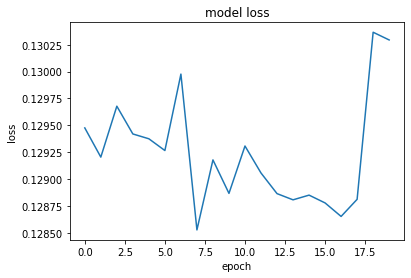

In [28]:
prediction = get_CV_prediction(df_train_x, y_train, best_params, df_test, output_dim_const)

In [ ]:
print("getting the AUC socre")
print("AUC score: ", test_nn_model(X_train, Y_train, X_test,Y_test,output_dim))

In [13]:
def tune(x,y):
    dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    learn_rate = [0.001,0.01,0.1] 
    model = KerasClassifier(build_fn=create_model,verbose=0,epochs=epoch_const, batch_size=batch_size_const)
    param_grid = dict( lr=learn_rate,dropout_rate=dropout_rate)
    grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)
    return grid.fit(x, y).best_params_

In [8]:
def create_model(lr,dropout_rate):
    return build_model(input_dim_const,output_dim_const,lr, dropout_rate)

In [9]:
def build_model(input_dim, output_dim,learn_rate=0.01,dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(output_dim, input_dim=input_dim, kernel_initializer='uniform', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_dim,activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = Adam(learning_rate=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])   
    return model

In [19]:
def find_best_output_size(x_train, y_train):
   
    x_train = x_train.to_numpy()
    scores = [0] * 10
    alpha_list = [i+1 for i in range(10)]
    kfold = KFold(n_splits=5)
    for alpha in alpha_list:
        for train, test in kfold.split(x_train, y_train):
            output_dim = getNumberOfNeurons(x_train.shape[0], alpha,x_train.shape[1])
            
            model = build_model(x_train[train].shape[1], output_dim)
            model.fit(x_train[train], y_train[train], epochs=epoch_const, batch_size=batch_size_const,verbose=1)
        
            scores[alpha-1]+=roc_auc_score(y_train[test],model.predict(x_train[test])[:,0])
            
        scores[alpha-1] = scores[alpha-1]/5
        
    alpha = scores.index(min(scores)) +1
    var = globals()
    output_dim = getNumberOfNeurons(x_train.shape[0], alpha, x_train.shape[1])
    var["output_dim_const"] = output_dim
    return output_dim

In [11]:
def get_CV_prediction(x, y, best_params, test_data, output_dim):
    x = x.to_numpy()
    learn_rate = best_params['lr']
    dropout_const = best_params['dropout_rate']
    var = globals()
    var["learn_rate_const"] = learn_rate
    var["dropout_rate"] = dropout_const
    print(learn_rate, dropout_const,output_dim)
    model = build_model(x.shape[1], output_dim,learn_rate,dropout_const)
    prediction = [0] * test_data.shape[0]
    kfold = KFold(n_splits=10)
    
    for train, test in kfold.split(x, y):
        history = model.fit(x[train],y[train],epochs=epoch_const,batch_size=batch_size_const)
        prediction +=model.predict(test_data)[:,0]
        
    prediction = prediction/11
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    return prediction


In [12]:
def getNumberOfNeurons(observation_size,alpha, input_size ):
    return math.floor(observation_size/(alpha*(input_size+1)))